In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
salary= pd.read_csv("Salary_Data.csv")

In [30]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
salary['Position']= pd.cut(x=salary['YearsExperience'], bins=3, labels=['Entry', 'Junior', 'Senior'])

In [32]:
avgsalary= salary.groupby('Position', as_index=False)['Salary'].mean().reset_index(drop=True).rename(columns={'Salary':'Average Salary'})
avgexperience= salary.groupby('Position', as_index=False)['YearsExperience'].mean().reset_index(drop=True).rename(columns= {'YearsExperience':'Average Experience'})

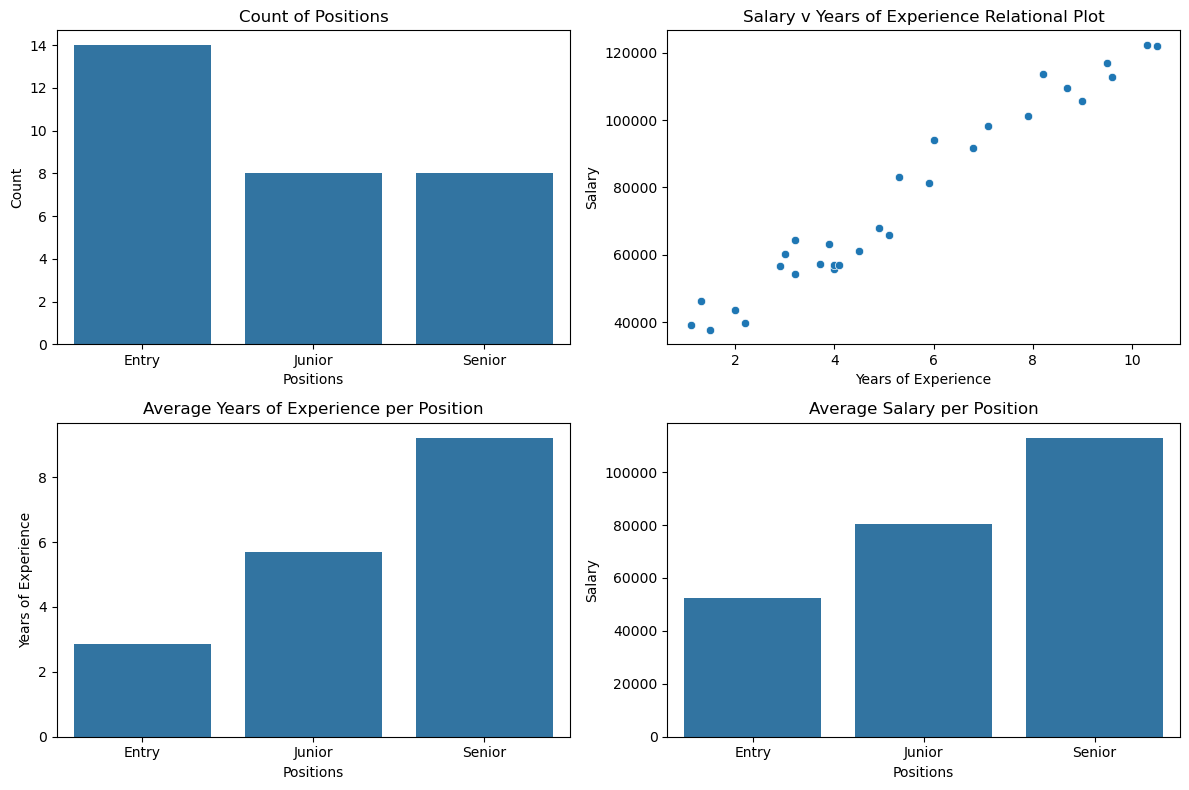

In [33]:
fig, ax= plt.subplots(2,2, figsize=(12,8))
sns.countplot(data=salary, x='Position', ax=ax[0,0])
ax[0,0].set_xlabel('Positions')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Count of Positions')

sns.scatterplot(data=salary, x='YearsExperience', y='Salary', ax= ax[0,1])
ax[0,1].set_xlabel('Years of Experience')
ax[0,1].set_ylabel('Salary')
ax[0,1].set_title('Salary v Years of Experience Relational Plot')

sns.barplot(x=avgexperience['Position'], y=avgexperience['Average Experience'], ax=ax[1,0]) # type: ignore
ax[1,0].set_xlabel('Positions')
ax[1,0].set_ylabel('Years of Experience')
ax[1,0].set_title('Average Years of Experience per Position')

sns.barplot(x=avgsalary['Position'], y=avgsalary['Average Salary'], ax=ax[1,1]) # type: ignore
ax[1,1].set_xlabel('Positions')
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Average Salary per Position')

plt.tight_layout()
plt.show()

In [34]:
x= np.array(salary['YearsExperience'])
y= np.array(salary['Salary'])

In [35]:
def cost(x, y, w, b):
    """computes the cost of each training example

    Args:
        x (ndarray(m,)): data
        y (ndarray(m,)): target values
        w, b (scalar): parameters

    Returns:
        total_cost (float): the total sum of cost value for all training example
    """
    m= x.shape[0]
    cost= 0
    for i in range(m):
        fwb_x= np.dot(w,x[i]) + b
        J= (fwb_x - y[i])**2
        cost+= J
    total_cost= cost/(2*m)
    return total_cost

In [36]:
cst= cost(x, y, 0, 0)
cst

3251477635.366667

In [37]:
def gradient(x, y, w, b):
    """computes the gradient w.r.t to each parameters

    Args:
        x (ndarray(m,)): data
        y (ndarray(m,)): target values
        w, b: parameters

    Returns:
        dj_dw, dj_db (scalar): the gradient w.r.t parameters w and b
    """
    m= x.shape[0]
    dj_dw= 0
    dj_db= 0
    for i in range(m):
        fwb_x= (np.dot(w,x[i]) + b) - y[i]
        dj_dwi= np.dot(fwb_x, x[i])
        dj_dbi= fwb_x
        dj_dw+= dj_dwi
        dj_db+= dj_dbi
    dj_dw= dj_dw/m
    dj_db= dj_db/m
    return dj_dw, dj_db

In [38]:
grads= gradient(x, y, 0, 0)
grads

(-477398.7, -76003.0)

In [39]:
def gradient_descent(x, y, iterations, init_w, init_b, alpha):
    """computes the gradient descent for the model by updating parameters w and b over a number of iterations

    Args:
        x (ndarray): data
        y (ndarray): target values
        iterations (int): number of times to update the parameters
        init_w, init_b (int): initial parameter values
        alpha (float): model learning rate
    
    Returns:
        w, b (scalar): final parameter values after running gradient descent
        J_history (list): a list of cost changes over each iteration
    """
    m= x.shape[0]
    b= init_b
    w= init_w
    J_history= []
    p_history= []
    for i in range(iterations):
        dj_dw, dj_db= gradient(x, y, w, b)
        w= w - np.dot(alpha, dj_dw)
        b= b - np.dot(alpha, dj_db)
        J_history.append(cost(x, y, w, b))
        p_history.append([w,b])
    return w, b, J_history

In [40]:
final_w, final_b, cost_history= gradient_descent(x, y, 100000, 0, 0, 0.001)

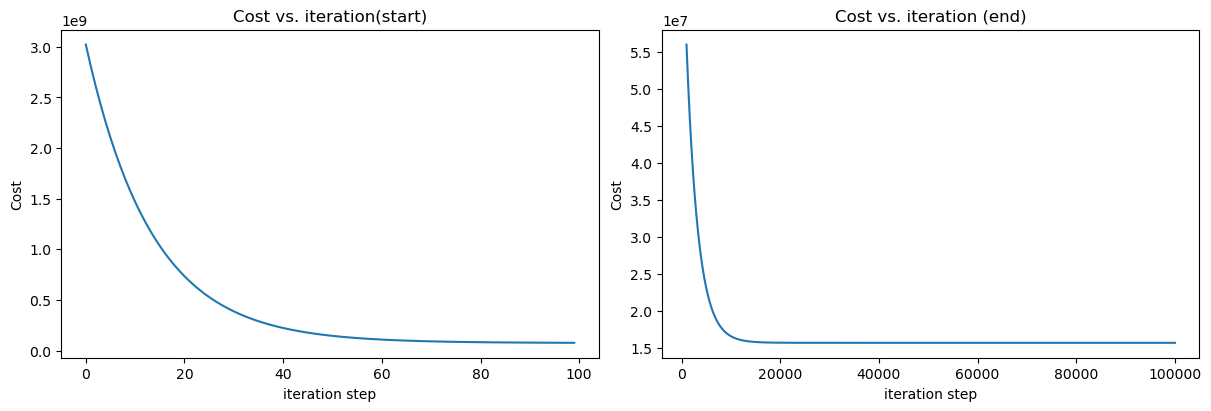

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [42]:
x_pred= []
for i in range(x.shape[0]):
    x_pred.append(np.dot(final_w, x[i]) + final_b)

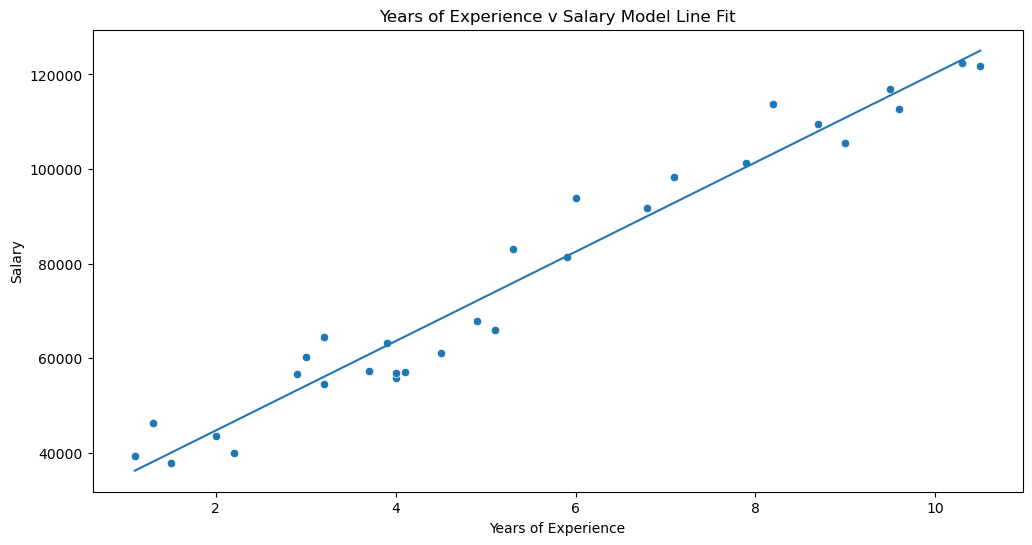

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=salary['YearsExperience'], y= salary['Salary'])
sns.lineplot(x=salary['YearsExperience'], y= x_pred)
plt.title('Years of Experience v Salary Model Line Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [44]:
test= np.array([11,12,13,14,15])
pred= []
for i in range(len(test)):
    pred.append(np.dot(final_w, test[i]) + final_b)
for i in range(test.shape[0]):
    print(f'Salary for {test[i]} years of experience is: {pred[i]}')

Salary for 11 years of experience is: 129741.78574447814
Salary for 12 years of experience is: 139191.74806823384
Salary for 13 years of experience is: 148641.71039198956
Salary for 14 years of experience is: 158091.67271574526
Salary for 15 years of experience is: 167541.63503950098
